In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
from spacetime.ca_simulators.CAs import *

ModuleNotFoundError: No module named 'numpy'

In [5]:
x = [0,1,2,3,4,5,6]
print(x[3:5])

[3, 4]


In [3]:
def random_string(length):
    '''
    Returns a random binary string of the given length.
    '''
    return [random.randint(0,1) for _ in range(length)]

In [52]:
def lookup_dict(rule_number):
    '''
    Returns a dictionary which maps ECA neighborhoods to output values. 
    Uses Wolfram rule number convention.
    '''
    neighborhoods = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]
    in_binary = '{:{fill}{align}{width}b}'.format(rule_number, 
                                                  fill='0', 
                                                  align='>', 
                                                  width='8')
    
    return dict(zip(neighborhoods, reversed(map(int,in_binary))))

In [5]:
class old_ECA(object):
    
    def __init__(self, rule_number, initial_condition):
        self.lookup_table = lookup_table(rule_number)
        self.initial = initial_condition
        self.spacetime = [initial_condition]
        self.current_configuration = initial_condition[:]
        self.length = len(initial_condition)

    def evolve(self, time):
        for t in range(time):
            new_configuration = []
            for i in range(self.length):

                neighborhood = (self.current_configuration[(i-1)], 
                                self.current_configuration[i], 
                                self.current_configuration[(i+1)%self.length])

                new_configuration.append(self.lookup_table[neighborhood])

            self.current_configuration = new_configuration
            self.spacetime.append(new_configuration)

In [6]:
def spacetime_diagram(spacetime_field, size=12, colors=plt.cm.Greys):
    '''
    
    '''
    plt.figure(figsize=(size,size))
    plt.imshow(spacetime_field, cmap=colors, interpolation='nearest')
    plt.show()

In [7]:
ca = ECA(110, random_string(100))
ca.evolve(100)

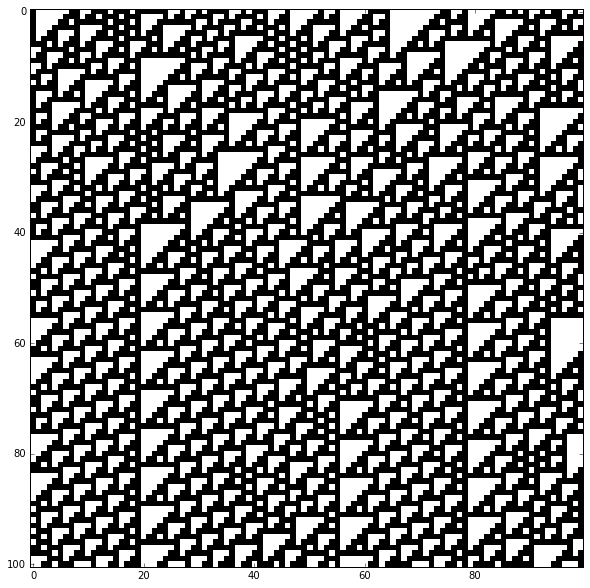

In [8]:
spacetime_diagram(ca.spacetime, size=10, colors=plt.cm.Greys)

In [9]:
def python_addition(array):
    return [element + 1 for element in array]

In [10]:
def numpy_addition(array):
    return array + 1

In [11]:
b = range(100000)
a = np.array(b)

In [16]:
def python_add(a, b):
    return [i + j for (i,j) in zip(a,b)]

In [17]:
def numpy_add(a,b):
    return a+b

In [23]:
x = [1,2,3]
y = [4,5,6]
print x+y
print np.array(x) + np.array(y)

[1, 2, 3, 4, 5, 6]
[5 7 9]


In [19]:
a = np.random.rand(1000)
b = np.random.rand(1000)

In [20]:
%timeit python_add(a,b)

The slowest run took 6.14 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 210 µs per loop


In [21]:
%timeit numpy_add(a,b)

The slowest run took 57.15 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.32 µs per loop


In [12]:
%timeit python_addition(b)

100 loops, best of 3: 4.13 ms per loop


In [29]:
%timeit -n 50000 -r 5 a + 1

50000 loops, best of 5: 56.8 µs per loop


In [15]:
%timeit numpy_addition(a)

The slowest run took 5.54 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 54.8 µs per loop


In [43]:
def add(a):
    return a + 1

In [44]:
%timeit map(add, b)

100 loops, best of 3: 11.4 ms per loop


In [42]:
l = ['a', 3, 5.6]
print np.array(l)
print np.array(l).dtype

['a' '3' '5.6']
|S3


In [32]:
type(a)

numpy.ndarray

In [33]:
print a.dtype

int64


In [24]:
a2 = np.array([1,2,3], dtype=np.uint8)

In [25]:
print a2[0]

1


In [26]:
print a2[1]
a2[1] = -1
print a2[1]

2
255


In [29]:
lookup = lookup_table(18, 2, 1)

In [30]:
print type(lookup)
print np.shape(lookup)
print np.size(lookup)
print len(lookup)

<type 'numpy.ndarray'>
(2, 2, 2)
8
2


In [74]:
for i in lookup:
    print i.flatten()

[0 1 0 0]
[1 0 0 0]


In [34]:
print lookup[(0,0,0)]

0


In [37]:
print lookup[np.array([0,0,1,0,1]), [1,1,1,0,0], (0,0,0,1,0)]

[0 0 0 1 1]


In [48]:
print bin(18)
print '{:b}'.format(18)

0b10010
10010


In [44]:
def np_lookup(rule_number):
    neighborhoods = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]
    in_binary = '{:{fill}{align}{width}b}'.format(rule_number, 
                                                  fill='0', 
                                                  align='>', 
                                                  width='8')
    table = np.empty((2,2,2), dtype=np.uint8)
    for inp, outp in zip(neighborhoods, reversed(map(int,in_binary))):
        table[inp] = outp
    return table

In [45]:
print np_lookup(18)[np.array([0,0,1,0,1]), [1,1,1,0,0], (0,0,0,1,0)]

[0 0 0 1 1]


In [61]:
class new_ECA(object):
    
    def __init__(self, rule_number, initial_condition):
        self.lookup_table = lookup_dict(rule_number)
        self.initial = np.array(initial_condition, dtype=np.uint8)
        self.spacetime = np.copy(self.initial)[np.newaxis,...]
        self.current_configuration = np.copy(initial_condition).astype(np.uint8)
        self.length = len(initial_condition)

    def evolve_1(self, time):
        new_spacetime = np.empty((time, self.length), dtype=np.uint8)
        for t in range(time):
            new_configuration = np.empty(self.length, dtype=np.uint8)
            for i in range(self.length):
                neighborhood = (self.current_configuration[(i-1)], 
                                self.current_configuration[i], 
                                self.current_configuration[(i+1)%self.length])

                new_configuration[i] = self.lookup_table[neighborhood]
            self.current_configuration = new_configuration
            new_spacetime[t] = self.current_configuration

        self.spacetime = np.concatenate((self.spacetime, new_spacetime))
        
    def evolve_2(self, time):
        new_spacetime = np.empty((time, self.length), dtype=np.uint8)
        current = self.current_configuration
        table = self.lookup_table
        length = self.length
        for t in range(time):
            new_configuration = np.empty(length, dtype=np.uint8)
            for i in range(self.length):
                neighborhood = (current[(i-1)], 
                                current[i], 
                                current[(i+1)%length])

                new_configuration[i] = table[neighborhood]
            current = new_configuration
            new_spacetime[t] = current
        self.current_configuration = current
        self.spacetime = np.concatenate((self.spacetime, new_spacetime))

In [54]:
test = new_ECA(18, random_string(10))

In [55]:
print test.current_configuration
test.evolve(1)
print test.current_configuration

[0 1 1 0 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0 1 0]


In [56]:
print test.spacetime

[[0 1 1 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0]]


In [59]:
test = new_ECA(110, random_string(1000))
%timeit test.evolve_1(1000)

1 loop, best of 3: 6.53 s per loop


In [62]:
test = new_ECA(110, random_string(1000))
%timeit test.evolve_2(1000)

1 loop, best of 3: 6.03 s per loop


In [67]:
print np.copy([1,1,1])
print np.copy(None)

[1 1 1]
None


In [77]:
a = np.array([1,2,3])
print np.shape(a)
print np.shape(a[np.newaxis,...])

(3,)
(1, 3)


In [78]:
print a
print a[np.newaxis, :]

[1 2 3]
[[1 2 3]]


In [79]:
print a[0]
print a[np.newaxis,:][0]

1
[1 2 3]
